*Alireza Abdi*

**Predicting Employee Turnover at Salifort Motors**

**Table of Contents**


1.	Introduction
2.	Data Preprocessing
3.	Model Building and Evaluation

 3.1 -Logistic Regression
 3.2 -Decision Tree
 3.3 -Random Forest
 3.4 -XGBoost

4.	Model Comparison
5.	Conclusion and Recommendations


# Introduction

Salifort Motors is a company facing a high rate of employee turnover. CEO  is concerned about the financial implications of this turnover, including the costs associated with recruiting, training, and upskilling new employees. In an effort to understand the reasons behind employee departures, the company seeks to predict and reduce turnover. To address this issue, the leadership team has tasked the data analyst with analyzing survey data from employees to build a predictive model that identifies whether an employee is likely to leave, based on various factors.

---




a dataset from the Human Resources department, which includes a variety of employee attributes such as:

- Job Title
- Department
- Number of Projects Assigned
- Average Monthly Working Hours
- Salary
- Satisfaction Level
- Years at the Company
- Last Evaluation Rating
- Work-Life Balance


# Data Preprocessing

Clean and prepare the data:

Handle missing values: You check for missing values in key columns and decide how to handle them (e.g., imputing missing values for numerical data or removing rows with missing target variables).
Feature Engineering: Convert categorical variables (like job title and department) into numerical values using techniques like One-Hot Encoding or Label Encoding.
Normalization/Scaling: For models like Logistic Regression and Decision Trees, you may need to scale numerical features (e.g., Average Monthly Hours and Salary) to ensure the model performs optimally.
Split the data: Split the dataset into training and testing sets (typically 80% for training and 20% for testing)

In [3]:
# prompt: write a code that recall data from my drive google under topic HR_dataset.csv


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Replace 'Your Folder Path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/HR_dataset.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import appropriate packages for data handling and visualizations
import numpy as np  # for array and matrix data structures
import pandas as pd  # for dataset management
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for visualizations

In [5]:
# Load the dataset
df_original = pd.read_csv("/content/drive/MyDrive/HR_dataset.csv")

# Display first few rows of the dataframe
df_original.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Descriptive statistics
df_original.describe(include = "all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [8]:
# Display column names
df_original.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename column names for consistency and simplicity
df1 = df_original.rename(columns = {"satisfaction_level" : "satisfaction",
                                    "last_evaluation" : "last_eval",
                                    "number_project" : "num_projects",
                                    "average_montly_hours" : "avg_hrs_month",
                                    "time_spend_company" : "years_at_company",
                                    "Work_accident" : "work_accident",
                                    "promotion_last_5years" : "promo_last_5yrs",
                                    "Department" : "department"})

# Display column names after update
df1.columns

Index(['satisfaction', 'last_eval', 'num_projects', 'avg_hrs_month',
       'years_at_company', 'work_accident', 'left', 'promo_last_5yrs',
       'department', 'salary'],
      dtype='object')

In [10]:
# Check for missing values in the dataset
df1.isna().sum()

,0
satisfaction,0
last_eval,0
num_projects,0
avg_hrs_month,0
years_at_company,0
work_accident,0
left,0
promo_last_5yrs,0
department,0
salary,0


In [11]:
# Check for duplicate entries
df1.duplicated().sum()

3008

In [12]:
# Inspect a few rows containing duplicates
df1[df1.duplicated()].head(n = 20)

,satisfaction,last_eval,num_projects,avg_hrs_month,years_at_company,work_accident,left,promo_last_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [13]:
print("Number of entries before removing duplicates:", df1.shape[0])

# Drop duplicates
df1.drop_duplicates(keep = "first", inplace = True)

print("Number of entries after removing duplicates:", df1.shape[0])
print("Number of duplicate entries removed:", df_original.shape[0] - df1.shape[0])

Number of entries before removing duplicates: 14999
Number of entries after removing duplicates: 11991
Number of duplicate entries removed: 3008


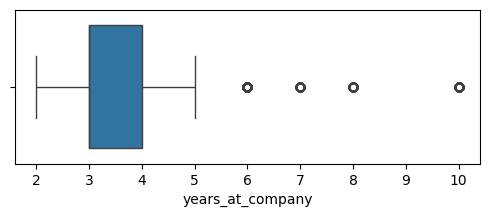

In [14]:
# Create a boxplot to visualize the distribution of the variable
# and detect outliers
plt.figure(figsize = (6, 2))
sns.boxplot(data = df1,
            x = "years_at_company",
            showfliers = True)
plt.show()

In [15]:
# Determine the number of rows containing outliers

percentile_25 = df1["years_at_company"].quantile(0.25)
percentile_75 = df1["years_at_company"].quantile(0.75)
iqr = percentile_75 - percentile_25  # iqr is the "interquartile range"
lower_limit = percentile_25 - (1.5 * iqr)
upper_limit = percentile_75 + (1.5 * iqr)

((df1["years_at_company"] < lower_limit) | (df1["years_at_company"] > upper_limit)).sum()

824

In [16]:
# Print numbers of employees who stayed vs. left
# Recall that for `left`, 0 indicates the employee stayed and 1 indicates that they left

print(df1["left"].value_counts())  # total numbers
print()
print(df1["left"].value_counts(normalize = True))  # percentages

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


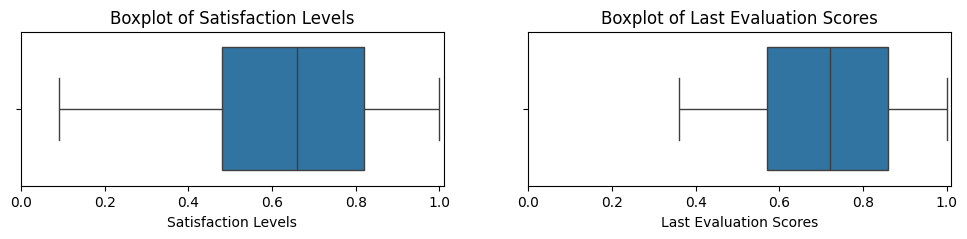

In [17]:
# Create boxplots of `satisfaction` and `last_eval`

fig, ax = plt.subplots(1, 2, figsize = (12, 2))

# `satisfaction`
sns.boxplot(data = df1,
            x = "satisfaction",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Satisfaction Levels")
ax[0].set_xlabel("Satisfaction Levels")
ax[0].set_xlim(0, 1.01)

# `last_eval`
sns.boxplot(data = df1,
            x = "last_eval",
            showfliers = True,
            ax = ax[1])
ax[1].set_title("Boxplot of Last Evaluation Scores")
ax[1].set_xlabel("Last Evaluation Scores")
ax[1].set_xlim(0, 1.01)

plt.show()

Text(0.5, 1.0, 'Last Evaluation Scores vs. Satisfaction Levels')

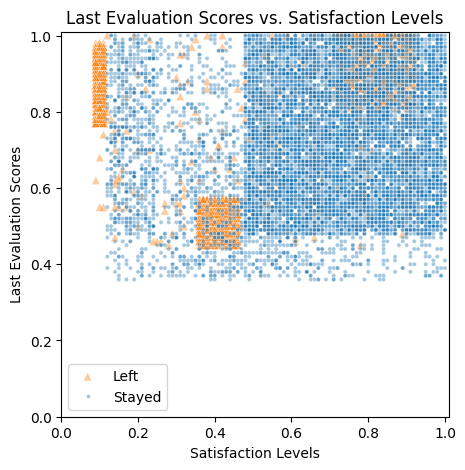

In [18]:
# Create a scatterplot to examine the relationships between
# `satisfaction`, last_eval`, and `left`

plt.figure(figsize = (5, 5))
sns.scatterplot(data = df1,
                x = "satisfaction",
                y = "last_eval",
                hue = "left",
                style = "left",
                markers = { 0 : ".", 1 : "^" },
                alpha = 0.4)
plt.legend(labels = ["Left", "Stayed"])
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.xlabel("Satisfaction Levels")
plt.ylabel("Last Evaluation Scores")
plt.title("Last Evaluation Scores vs. Satisfaction Levels")

From this scatterplot, a few key points can be seen:

There are several employees who, although having scored quite well on their most recent performance review, were quite dissatisfied with the company and likely chose to leave.
There appears to be a cluster of employees were on the lower end of work performance and also displayed lower levels of satisfaction with the company. These employees either may have chose to leave the company or may have been asked to leave.
There also appears to be a cluster of employees on the higher end of work performance and also displayed higher levels of satisfaction with the company, but ultimately left the company as well. The rationale behind this requires further investigation.

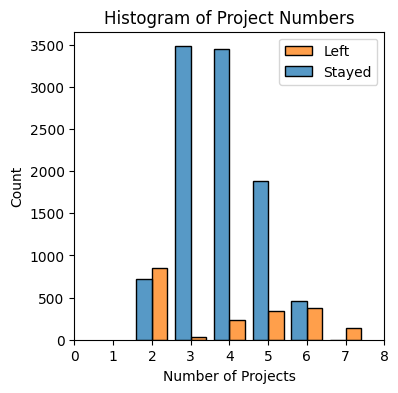

In [19]:
# Plot `num_projects` split into groups by `left`

plt.figure(figsize = (4, 4))
sns.histplot(data = df1,
             x = "num_projects",
             hue = "left",
             discrete = True,
             multiple = "dodge",
             shrink = 0.8)
plt.legend(labels = ["Left", "Stayed"])
plt.title("Histogram of Project Numbers")
plt.xlabel("Number of Projects")
plt.xticks(range(0, 9))
plt.show()

In between range of low and high projects that have beed doen  is optimal point of staying! not too much and not too low.

Text(0.5, 1.0, 'Number of Projects vs. Average Hours per Month')

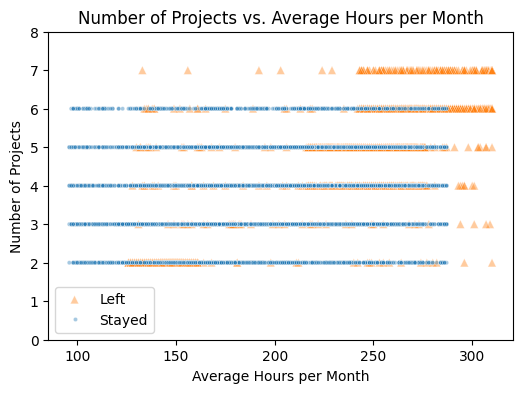

In [20]:
# Create a scatterplot of `num_projects` vs. `avg_hrs_month`
# and how this relates to employee turnover

plt.figure(figsize = (6, 4))
sns.scatterplot(data = df1,
                x = "avg_hrs_month",
                y = "num_projects",
                hue = "left",
                style = "left",
                markers = { 0 : ".", 1 : "^" },
                alpha = 0.4)
plt.legend(labels = ["Left", "Stayed"])
plt.ylim(0, 8)
plt.xlabel("Average Hours per Month")
plt.ylabel("Number of Projects")
plt.title("Number of Projects vs. Average Hours per Month")

As can be seen people satying with company when they take normal hours. not too much and not too low, otherwise people will leave.

Text(0.5, 1.0, 'Recent Promotions vs. Average Hours per Month')

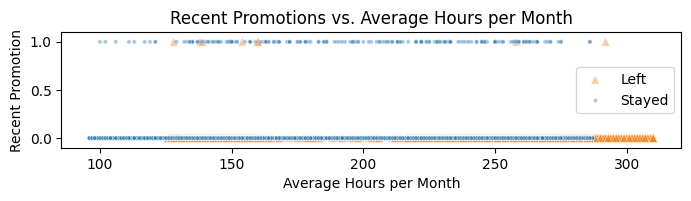

In [21]:
# Plot `avg_hrs_month` and `promo_last_5yrs`
# and how this relates to employee turnover

plt.figure(figsize = (8, 1.5))
sns.scatterplot(data = df1,
                x = "avg_hrs_month",
                y = "promo_last_5yrs",
                hue = "left",
                style = "left",
                markers = { 0 : ".", 1 : "^" },
                alpha = 0.4)
plt.legend(labels = ["Left", "Stayed"])
plt.ylim(-0.1, 1.1)
plt.xlabel("Average Hours per Month")
plt.ylabel("Recent Promotion")
plt.title("Recent Promotions vs. Average Hours per Month")

if employee work more they will leave.

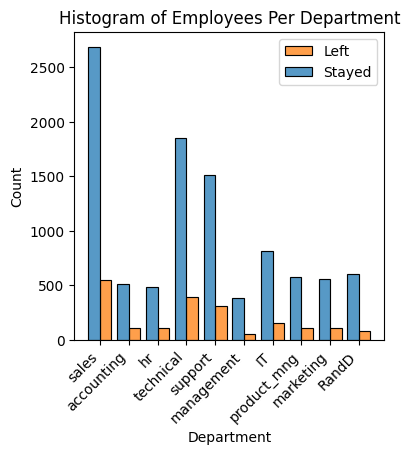

In [22]:
# Plot `department` split into groups by `left`
plt.figure(figsize = (4, 4))
sns.histplot(data = df1,
             x = "department",
             hue = "left",
             discrete = True,
             multiple = "dodge",
             shrink = 0.8)
plt.legend(labels = ["Left", "Stayed"])
plt.title("Histogram of Employees Per Department")
plt.xlabel("Department")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

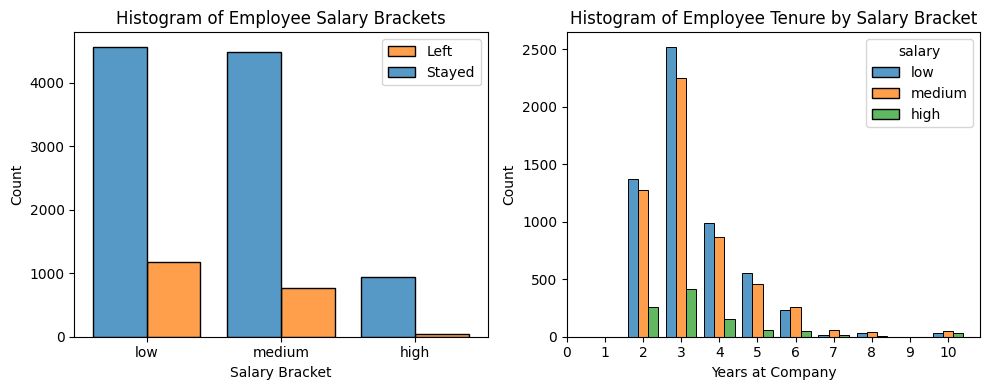

In [23]:
# Create histograms of `salary` split by `left`
# and `years_at_company` split by `salary`

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.histplot(data = df1,
             x = "salary",
             hue = "left",
             discrete = True,
             multiple = "dodge",
             shrink = 0.8,
             ax = ax[0])
ax[0].legend(labels = ["Left", "Stayed"])
ax[0].set_title("Histogram of Employee Salary Brackets")
ax[0].set_xlabel("Salary Bracket")

sns.histplot(data = df1,
             x = "years_at_company",
             hue = "salary",
             discrete = True,
             multiple = "dodge",
             shrink = 0.8,
             ax = ax[1])
ax[1].set_title("Histogram of Employee Tenure by Salary Bracket")
ax[1].set_xlabel("Years at Company")
ax[1].set_xticks(range(0, 11))

fig.tight_layout()
plt.show()

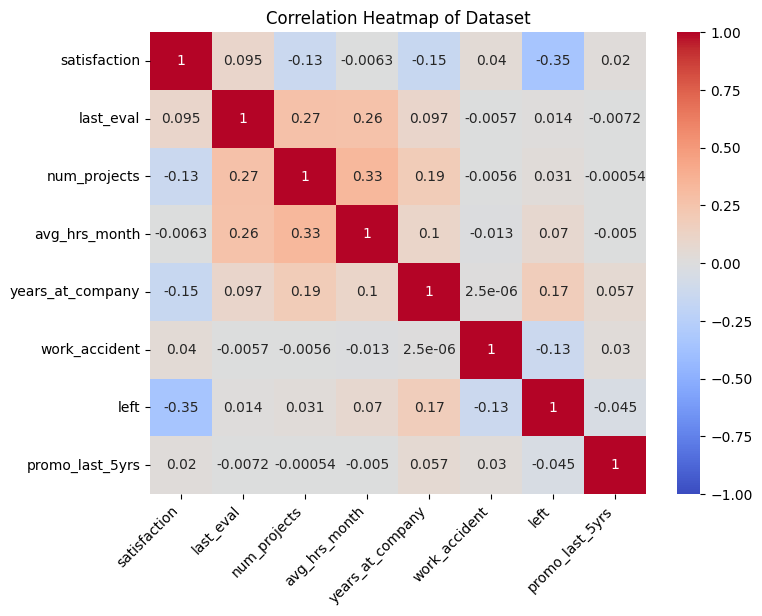

In [24]:
# Create a heatmap of variable correlations

plt.figure(figsize = (8, 6))
sns.heatmap(df1.corr(numeric_only = True),
            vmin = -1.0,
            vmax = 1.0,
            annot = True,  # sets annotation to be true
            cmap = "coolwarm")
plt.title("Correlation Heatmap of Dataset")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

In [25]:
# Convert `department` categorical variable to dummy variables
df2 = pd.get_dummies(df1, columns = ["department"], drop_first = True)
df2.head()

,satisfaction,last_eval,num_projects,avg_hrs_month,years_at_company,work_accident,left,promo_last_5yrs,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False


In [26]:
# While `salary` may also be encoded via dummy variables
# there is some hierarchy to the categories (ordinal).
# Therefore, at this stage, it will be mapped to a hierarchy.

df2["salary"] = df2["salary"].map({"low" : 0,
                                   "medium" : 1,
                                   "high" : 2})
df2.head()

,satisfaction,last_eval,num_projects,avg_hrs_month,years_at_company,work_accident,left,promo_last_5yrs,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


**Logistic Regression Model**

The prediction task in this case is a binary classification: either employees left the company (True or 1) or they did not (False or 0). This type of task lends itself to a logistic regression model.

A logistic regression model requires the following assumptions:

The outcome variable is categorical
Observations are independent of each other
There is no severe multicollinearity among predictor variables
There are no extreme outliers
A linear relationship between each X variable and the logit of the outcome variable
There is a sufficiently large sample size

In [28]:
 #Import statements
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
# Remove outliers in the `years_at_company`
outlier_mask = (df2["years_at_company"] >= lower_limit) & (df2["years_at_company"] <= upper_limit)
df3 = df2[outlier_mask]

# Confirm that outliers were removed
((df3["years_at_company"] < lower_limit) | (df3["years_at_company"] > upper_limit)).sum()

0

In [29]:
# Investigate class balance after removing outliers
df3["left"].value_counts(normalize = True)

,proportion
left,
0,0.831468
1,0.168532


In [30]:
# Select X and y variables
y = df3["left"]
X = df3.drop(columns = ["satisfaction", "left"])

# Note that for model building, the variable `satisfaction` is removed.
# In actual deployment, this variable would not be available as
# satisfaction levels were only determined by surveying a sample
# of employees.
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42)
# Confirm training and testing set sizes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (8375, 16)
y_train: (8375,)
X_test: (2792, 16)
y_test: (2792,)


In [31]:
# Instantiate model and fit to the training set
clf = LogisticRegression(max_iter = 500,  # must be changed for solver to converge
                         random_state = 42).fit(X_train, y_train)

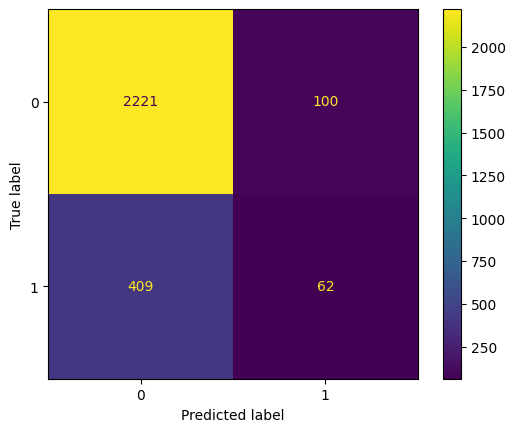

In [32]:
# Compute and save model predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred,
                              labels = clf.classes_)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = clf.classes_)

# Display matrix
disp.plot(values_format = "")  # argument suppresses scientific notation

In [33]:
# Define function for outputting model evaluation results in DataFrame

def classification_report_df(eval_df, model, y_test, y_pred):
    """
    Calculates evaluation metrics of the provided `model` (string) with associated
    `y_test` (true) and `y_pred` (predicted) values and concatenates it
    to the provided DataFrame `eval_df`.
    """

    # Calculate evaluation metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Instantiate evaluation metrics dictionary
    eval_dict = {"Accuracy" : accuracy,
                 "Precision" : precision,
                 "Recall" : recall,
                 "F1 Score" : f1,
                }

    # Conver to a DataFrame
    df_to_concatenate = pd.DataFrame(eval_dict, index = [model])

    # Concatenate dictionary to provided DataFrame
    eval_df = pd.concat([eval_df, df_to_concatenate])

    return eval_df
# Create DataFrame to keep records of evaluated models

eval_df = pd.DataFrame()

eval_df = classification_report_df(eval_df, "Logistic Regression", y_test, y_pred)

eval_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.817693,0.382716,0.131635,0.195893


In [34]:
# Get feature names from model
# and model coefficients (log-odds ratios)
# and exponentiate coefficients for better interpretation
# Output as a DataFrame

import math
pd.DataFrame(data = {"Feature Name" : X_train.columns,
                     "Model Coefficient" : clf.coef_[0],
                     "Exponentiated Model Coefficient" : math.e ** clf.coef_[0]})

,Feature Name,Model Coefficient,Exponentiated Model Coefficient
0,last_eval,-1.301788,0.272045
1,num_projects,-0.213005,0.808152
2,avg_hrs_month,0.002517,1.002520
3,years_at_company,1.115379,3.050725
4,work_accident,-1.440885,0.236718
5,promo_last_5yrs,-1.227712,0.292962
6,salary,-0.526906,0.590429
7,department_RandD,-0.244253,0.783289
8,department_accounting,-0.063151,0.938801
9,department_hr,0.129640,1.138418


The logistic regression model demonstrates decent accuracy; however, it struggles significantly with precision and recall. This indicates the model is ineffective at correctly identifying employees who are likely to leave, which is a critical focus for the analysis. According to the confusion matrix, the model frequently misclassifies employees as unlikely to leave when they actually do (false negatives).

The coefficients of the model shed light on the factors influencing predictions:

Negatively Associated with Turnover:

Last Evaluation Score: Employees with higher evaluation scores are less likely to leave the company.
Number of Projects: Employees contributing to more projects show a lower likelihood of leaving. Interestingly, employees involved in only two projects had a higher turnover rate, which might reflect forced separations rather than voluntary resignations.
Work Accidents: Experiencing a work accident reduces the likelihood of turnover, potentially due to how the company supports employees during such events or the perceived job security following an accident.
Promotion in the Last 5 Years: Employees who have received recent promotions tend to stay longer, which aligns with the expectation that promotions enhance job satisfaction and commitment.
Salary: Higher salaries are associated with lower turnover, likely because they contribute to employees feeling valued and compensated appropriately.
Positively Associated with Turnover:

Years at the Company (Tenure): Longer tenure is positively linked to turnover, suggesting employees may seek change after extended periods at the company.
Overall, the current logistic regression model does not effectively predict whether an employee will leave, especially given its challenges with false negatives. Further refinement and enhancements are necessary to improve its robustness and reliability.

**Random Forest Model**


There are a number of machine learning models that lend themselves to classification tasks. In particular, tree-based models have several advantages, including:

Requiring no assumptions regarding the underlying distribution of data
Handling collinearity well
Do not require data scaling or normalization
Decisions are transparent and interpretable
Handling outliers well
However, tree-based models can be susceptible to overfitting. But ensembling techniques such as bagging and boosting can help prevent overfitting. Here, two tree-based ensembling models will be built and compared: a random forest and an extreme gradient boosted (XGBoost) model.

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import pickle  # for saving models for later

In [38]:
# Select X and y variables
y = df2["left"]
X = df2.drop(columns = ["satisfaction", "left"])

# Note that for model building, the variable `satisfaction` is removed.
# In actual deployment, this variable would not be available as
# satisfaction levels were only determined by surveying a sample
# of employees.
# Split into training and testing sets (80/20)
X_tr, X_test, y_tr, y_test = train_test_split(X,
                                              y,
                                              test_size = 0.20,
                                              stratify = y,
                                              random_state = 42)
# Split training data into training and validation sets (75/25) --> (60/20/20 final)
X_train, X_val, y_train, y_val = train_test_split(X_tr,
                                                  y_tr,
                                                  test_size = 0.25,
                                                  stratify = y_tr,
                                                  random_state = 42)
# Confirm shapes of training, validation, and testing sets
print("Training data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
print("Testing data:", X_test.shape, y_test.shape)

Training data: (7194, 16) (7194,)
Validation data: (2398, 16) (2398,)
Testing data: (2399, 16) (2399,)


# Model Building and Evaluation

In [43]:
# Instantiate the model
rf = RandomForestClassifier(random_state = 42)

# Hyperparameters to tune
cv_params = {"n_estimators" : [50, 100, 200],
             "max_depth" : [5, 8, None],
             "min_samples_leaf" : [1, 2],
             "min_samples_split" : [2, 3],
             "max_features" : [0.3, 0.6],
             "max_samples" : [0.75]}

# Scoring metrics
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,
                     cv_params,
                     scoring = scoring,
                     cv = 5,  # cross-validation with five folds
                     refit = "recall",  # focus on reducing false negatives
                     n_jobs = -1,  # use all processors to run in parallel
                     verbose = 1)  # display computation time for each fold

In [44]:
%%time

# Fit the model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 3.37 s, sys: 616 ms, total: 3.99 s
Wall time: 3min 37s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.75], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [49]:
# Define a path to the folder for saving the model
path = "/content/drive/MyDrive/Colab Notebooks"
# Pickle the model
with open(path+"rf_cv_model.pickle", "wb") as to_write:
    pickle.dump(rf_cv, to_write)
# Open pickled random forest model
with open(path+"rf_cv_model.pickle", "rb") as to_read:
    rf_cv = pickle.load(to_read)

**Evaluate the Random Forest Model**

In [50]:
# Print best score
print("Best Average Refit Score (Recall):", "%.5f" % rf_cv.best_score_)

Best Average Refit Score (Recall): 0.90544


In [51]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 0.6,
 'max_samples': 0.75,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

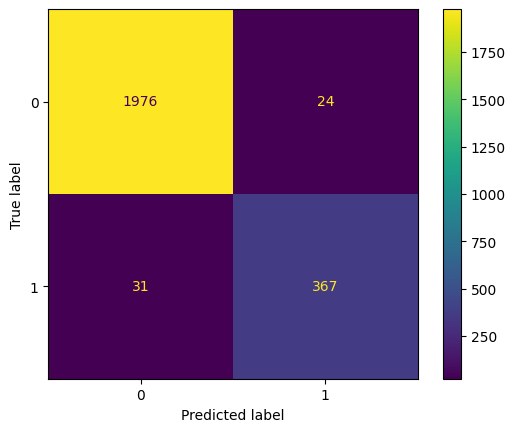

In [52]:
# Test the random forest "best estimator" model on the validation data
y_val_pred = rf_cv.best_estimator_.predict(X_val)
# Plot validation data confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = rf_cv.classes_)
disp.plot(values_format = "")  # argument suppresses scientific notation

In [53]:
# Add random forest evaluation to DataFrame and display
eval_df = classification_report_df(eval_df, "Random Forest", y_val, y_val_pred)
eval_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.817693,0.382716,0.131635,0.195893
Random Forest,0.977064,0.938619,0.922111,0.930292


Text(0.5, 0, 'Mean Decrease in Gini Impurity')

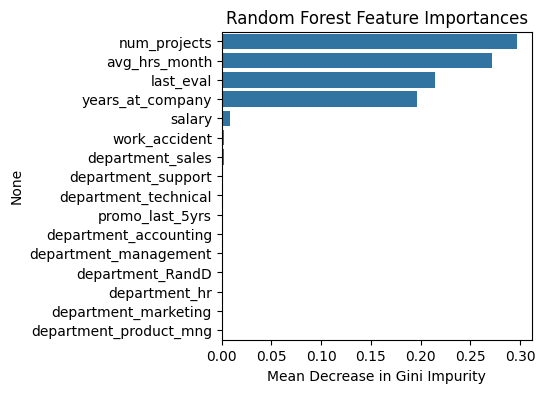

In [54]:
# Plot feature importances

importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

fig = plt.figure(figsize = (4, 4))
sns.barplot(y = rf_importances.index,
            x = rf_importances.values)
plt.title("Random Forest Feature Importances")
plt.xlabel("Mean Decrease in Gini Impurity")

Random Forest Model Summary
Based on the evaluation metrics from the validation data, the random forest model performs much better than the previously established logistic regression model with precision and importantly recall scores above 0.90.

The top features that the random forest identified as important are:


- num_projects
- avg_hrs_month
- last_eval
- years_at_company
- salary to a lesser extent.

These features all make sense based on the previous EDA conducted. They also align in some ways with the logistic regression model, although the random forest here likely identifies more important features as the model performs much better.

**Extreme Gradient Boosted (XGBoost) Model**


Import statements and data preparation for the XGBoost model are the same as those of the random forest model developed above and do not need to be repeated.



In [58]:
# Instantiate the model
xgb = XGBClassifier(objective = "binary:logistic",
                    random_state = 42)

# Hyperparameters to tune
cv_params = {"n_estimators" : [50, 100, 200],
             "max_depth" : [5, 8, None],
             "min_child_weight" : [3, 5],
             "learning_rate" : [0.1, 0.2, 0.3],
             "subsample" : [0.75],
             "colsample_bytree" : [0.75]}

# Scoring metrics
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,  # cross-validation with five folds
                      refit = "recall",  # focus on reducing false negatives
                      n_jobs = -1,  # use all processors to run in parallel
                      verbose = 1)  # display computation time for each fold

In [59]:
%%time

# Fit the model
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 1.93 s, sys: 239 ms, total: 2.17 s
Wall time: 57.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.75],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 8, None], 'min_child_weight': [3, 5],
                         'n_estimators': [50, 100, 200], 'subsample': [0.75]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [64]:
# Pickle the model
with open(path+'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)
# Open pickled XGBoost model
with open(path+'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [65]:
# Print best recall score
print("Best Average Refit Score (Recall):", "%.5f" % xgb_cv.best_score_)

Best Average Refit Score (Recall): 0.89958


In [66]:
# Examine best hyperparameters
xgb_cv.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 0.1,
 'max_depth': None,
 'min_child_weight': 3,
 'n_estimators': 50,
 'subsample': 0.75}

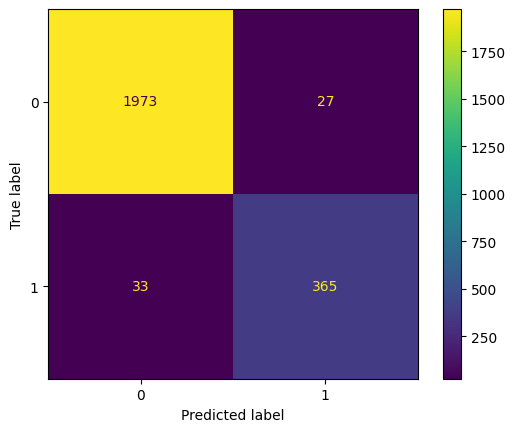

In [67]:
# Use the xgboost "best estimator" model for the validation data
y_val_pred = xgb_cv.best_estimator_.predict(X_val)
# Plot validation data confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = xgb_cv.classes_)
disp.plot(values_format = "")  # argument suppresses scientific notation

In [68]:
# Add random forest evaluation to DataFrame and display
eval_df = classification_report_df(eval_df, "XGBoost", y_val, y_val_pred)
eval_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.817693,0.382716,0.131635,0.195893
Random Forest,0.977064,0.938619,0.922111,0.930292
XGBoost,0.974979,0.931122,0.917085,0.924051


Text(0.5, 0, 'Mean Decrease in Gini Impurity')

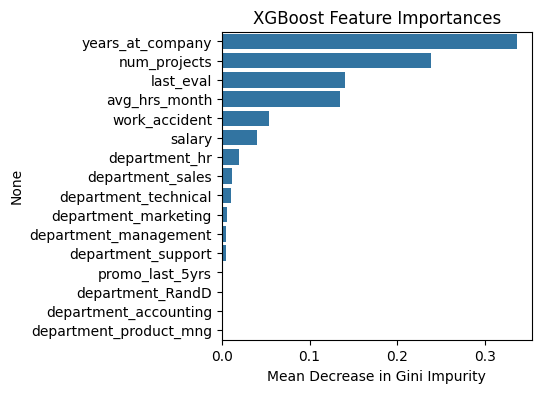

In [69]:
# Plot feature importances

importances = xgb_cv.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

fig = plt.figure(figsize = (4, 4))
sns.barplot(y = xgb_importances.index,
            x = xgb_importances.values)
plt.title("XGBoost Feature Importances")
plt.xlabel("Mean Decrease in Gini Impurity")

XGBoost Model Summary
Based on the evaluation metrics presented from the validation data, the XGBoost model performs much better than the previously established logistic regression model with precision and importantly recall scores above 0.90. However, the XGBoost model's recall score is slightly worse than the random forest model's (with a tradeoff that the XGBoost model's precision is slightly better than the random forest model's). Ultimately, because the aim of this project is to predict employee's who are likely to leave the company, the goal would be to:

Maximize the number of true positives classified (employees who are going to leave and are predicted as such), and
Minimize the number of false negatives classified (employees who are going to leave but are predicted to not leave)
This is best represented by a high recall score given that:

recall
=
true positives
true positives
+
false negatives
Therefore, although the random forest and XGBoost model perform similarly well, the random forest model will be considered the champion model based on its slightly better recall score.

The top features that the XGBoost model identified as important are:

num_projects
years_at_company
last_eval
avg_hrs_month
And to lesser extents: work_accident, salary, and different departments
These top four features are the same as those identified by the random forest model, which is great corroboration that these features provide predictive power.

**Final Model Evaluation**

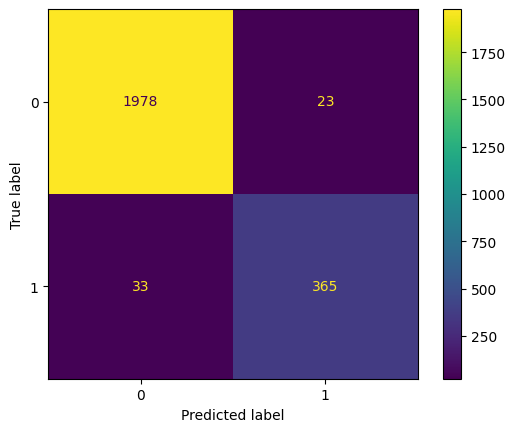

In [70]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(X_test)
# Create and display a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = rf_cv.classes_)
disp.plot(values_format = "")  # argument suppresses scientific notation

In [71]:
# Calculate and print out evaluation metrics
print("Champion Model: Random Forest")
print("Accuracy: ", "%.5f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: ", "%.5f" % metrics.precision_score(y_test, y_pred))
print("Recall: ", "%.5f" % metrics.recall_score(y_test, y_pred))
print("F1 Score: ", "%.5f" % metrics.f1_score(y_test, y_pred))

Champion Model: Random Forest
Accuracy:  0.97666
Precision:  0.94072
Recall:  0.91709
F1 Score:  0.92875


In [72]:
# For comparison to validation results
eval_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.817693,0.382716,0.131635,0.195893
Random Forest,0.977064,0.938619,0.922111,0.930292
XGBoost,0.974979,0.931122,0.917085,0.924051


When tested against the holdout test dataset, the random forest model performs very well with accuracy, precision, and recall scores all above 0.90. The metric scores against the test dataset are very similar to the scores against the validation dataset, suggesting that the model is robust with strong predictive power.

# Conclusion and Recommendations

Three models were developed to classify employees as likely to leave or stay with Salifort Motors (employee turnover vs. retention):

Logistic Regression
Random Forest
Extreme Gradient Boosting (XGBoost)
The machine learning models (Random Forest and XGBoost) significantly outperformed the logistic regression model. Between the two, the Random Forest model achieved slightly better recall than XGBoost. The best-performing model (Random Forest) demonstrated strong performance on the holdout test dataset, achieving accuracy, precision, and recall scores all above 0.90.

Key Findings
The machine learning models identified similar key features for predicting employee turnover:

num_projects: The number of projects an employee contributes to.
avg_hrs_month: The average number of hours an employee works per month.
last_eval: The employee's evaluation score from their most recent performance review.
years_at_company: The employee's tenure at the company.
Recommendations
Based on exploratory data analysis (EDA) and the important features identified in the models, the findings suggest that employees at Salifort Motors may be overworked. To mitigate burnout and improve retention, the following actions are recommended:

Limit Project Assignments: Reduce the number of projects assigned to employees to lower average monthly working hours.
Recognize and Reward Efforts: Offer incentives for employees working long hours or achieving high evaluation scores to boost morale and retention.
Review Promotion and Raise Policies: If only a limited number of employees can receive raises or promotions, this could foster dissatisfaction and feelings of being undervalued. Revising these policies may improve job satisfaction.
Evaluate Work Culture: Conduct in-depth investigations into the company culture that promotes long working hours by engaging employees and leadership.
Continual Employee Surveys: Use regular surveys to monitor and improve the employee experience over time.
Next Steps
Although the machine learning models performed well on the validation dataset, further enhancements could improve performance:

Feature Engineering: Additional feature transformations could enhance model accuracy. For instance, converting avg_hrs_month into an ordinal variable to represent employees working fewer, average, or significantly more hours than the company average.
Hyperparameter Tuning: Only a limited hyperparameter space was explored due to time and computational constraints. Expanding the search space could optimize model performance while maintaining efficiency.
Retraining with Full Dataset: Prior to deployment, the model should be retrained using the full dataset to maximize learning and accuracy.
Post-Deployment Monitoring: Continuous tracking of model performance and robustness is essential to ensure the deployed model remains effective in real-world scenarios.
By implementing these recommendations and next steps, Salifort Motors can further refine its predictive capabilities and create a supportive work environment to enhance employee satisfaction and retention.

In [83]:
!jupyter nbconvert --to pdf /content/Alireza_Abdi_Predicting_Employee_Turnover.ipynb

[NbConvertApp] Converting notebook /content/Alireza_Abdi_Predicting_Employee_Turnover.ipynb to pdf
[NbConvertApp] Support files will be in Alireza_Abdi_Predicting_Employee_Turnover_files/
[NbConvertApp] Making directory ./Alireza_Abdi_Predicting_Employee_Turnover_files
[NbConvertApp] Writing 129009 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 701456 bytes to /content/Alireza_Abdi_Predicting_Employee_Turnover.pdf
